In [2]:
import numpy as np

from numpy import array, arange, zeros, dot, hstack
from numpy.random import randn

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import pcolor

# Perceptrón

In [19]:
escalon = lambda x,t: 1 if x>=t else 0
sigmoide = lambda x: 1/(1+np.exp(x))
sigmoide(0)

0.5

In [20]:
class perceptron(object):
    def __init__(self, th, W, f):
        self.W = W
        self.th = th
        self.f = f
    def computa(self,X):
        val = dot(X, self.W)
        res = self.f(val)
        return res

Implementando el perceptrón

In [23]:
P = perceptron(0.5, np.array([.7,.7]), sigmoide)

In [24]:
P.computa( [0, 1] )

0.3318122278318339

## Visualización

In [25]:
def grafica(P):
    Xm = arange(-0.1, 1.1, 0.01)
    Ym = arange(-0.1, 1.1, 0.01)
    Z = zeros((len(Xm), len(Ym)))

    for i in range(len(Xm)):
        for j in range(len(Ym)):
            Z[i,j] = P.computa( [Xm[i], Ym[j]] )
    plt.clf()
    pcolor(Xm, Ym, Z)
    plt.colorbar()
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


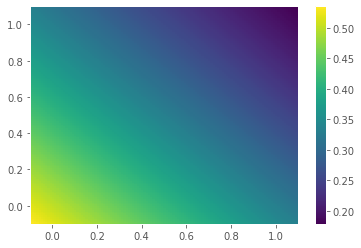

In [26]:
grafica(P)

### Ejercicio

Variar los pesos para seleccionar

1. Estímulo (0,0), (1,0)
1. Estímulos (0,0), (0,1)
1. Estímulos (0,1), (1,0), (1,1)
1. Estímulos (0,0), (0,1), (1,1)
1. Estímulos (0,0), (0,1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


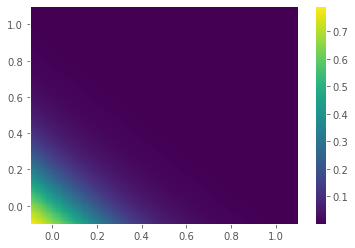

In [28]:
P = perceptron(1, [1/.15,1/.15], sigmoide)
grafica(P)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


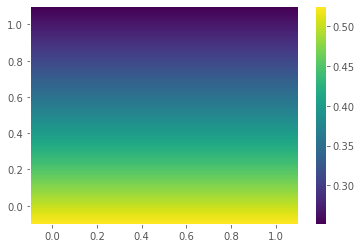

In [31]:
P = perceptron(0.5, [1,0], sigmoide)
grafica(P)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


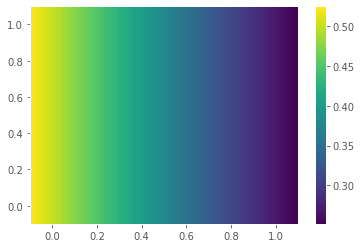

In [32]:
P = perceptron(0.5, [0,1], sigmoide)
grafica(P)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


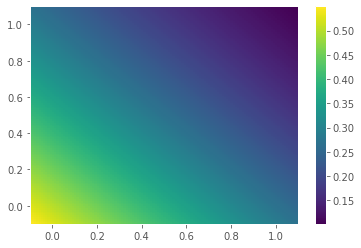

In [34]:
P = perceptron(1.85, [1,1],sigmoide)
grafica(P)

## Multicapa

In [82]:
class pmc(object):
    def __init__(self, A, fact ):
        ni, nh, no = A
        #pesos
        self.Wh = randn(ni,nh)
        self.Ws = randn(nh,no)
        #capas
        self.H = zeros((nh,))
        self.O = zeros((no,))
        self.f  = fact
    def ff(self, X):
        #capa oculta
        #integracion
        self.H = dot(X,self.Wh)
        #activacion
        self.H = hstack( (1,self.f(self.H) ) )
        #capa salida
        #integracion
        self.O = array(dot(self.H,self.Ws))
        #activacion
        self.O = self.f(array( [self.O] ))
        return self.O
    def set_pesos(self,Wh,Wo):
        self.Wh = Wh
        self.Ws = Wo
    def get_pesos(self):
        return(self.Wh, self.Ws)

Instanciamos el perceptrón en `P` con la arquitectura `[2,2,1]` y la función de activación es la función lambda `lambda X: [1 if x>=0 else 0 for x in X]`. Después establecemos los pesos en la capa entrada-escondida con `Wh`, y los pesos de la escondida-salida con `Ws`. Nuestros umbrales están considerados como un nodo de sesgo por eso nuestros estímulos van a tener una entrada constante `1`.

In [83]:
escalon = lambda X: [1 if x>=0 else 0 for x in X]
P = pmc([2,2,1], escalon)
Wh = array([[-.5,-.5],[1,-1],[-1,1]])
Ws = array([-0.5, 1,1])


P.set_pesos(Wh,Ws)


In [84]:
X = [1,0,0]
P.ff(X)

[0]

Todos los estímulos en el cuadrado unitario

In [85]:
X = array([[1,0,0],
           [1,1,0],
           [1,0,1],
           [1,1,1]])
[P.ff(x) for x in X]

[[0], [1], [1], [0]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  import sys


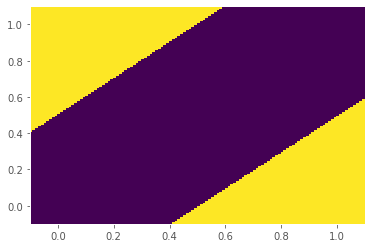

In [86]:
Xm = arange(-0.1, 1.1, 0.01)
Ym = arange(-0.1, 1.1, 0.01)
Z = zeros((len(Xm),len(Ym)))
for i in range(len(Xm)):
    for j in range(len(Ym)):
        Z[i,j] = P.ff( array( [1,Xm[i],Ym[j]] ) )[0]
pcolor(Xm,Ym,Z)
plt.show()